<a href="https://colab.research.google.com/github/anjanapjayapal/Stock-market-analysis-and-prediction/blob/main/Stock_price_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **1. DATA EXPLORATION & PREPROCESSING**


In [ ]:
!pip install yfinance # Python library to access historical market data from Yahoo Finance

1.1 DOWNLOADING DATA

The stock data for Apple (AAPL), Google (GOOG), Microsoft (MSFT), and Amazon (AMZN) was collected using the yfinance library. This data included information such as the opening price, closing price, high, low, adjusted closing price, and trading volume. The time range for data collection was set to the previous year from the current date.

In [ ]:
import yfinance as yf
import pandas as pd

tickers = ['msft', 'aapl', 'goog', 'amzn']
stock_data = {}

for symbol in tickers:
    stock_data[symbol] = yf.download(symbol, period="1y")
    # 1. Ensure 'Date' is the index and is of datetime type
    stock_data[symbol] = stock_data[symbol].set_index(pd.to_datetime(stock_data[symbol].index))

# 2. Concatenate with explicit outer join and handle index carefully

df = pd.concat(stock_data, axis=1, keys=tickers, join='outer')

print(df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                                 msft                                      \
Price                       Adj Close       Close        High         Low   
Ticker                           MSFT        MSFT        MSFT        MSFT   
Date                                                                        
2023-11-02 00:00:00+00:00  345.724976  348.320007  348.829987  344.769989   
2023-11-03 00:00:00+00:00  350.171600  352.799988  354.390015  347.329987   
2023-11-06 00:00:00+00:00  353.873779  356.529999  357.540009  353.350006   
2023-11-07 00:00:00+00:00  357.844025  360.529999  362.459991  357.630005   
2023-11-08 00:00:00+00:00  360.494141  363.200012  363.869995  360.549988   
...                               ...         ...         ...         ...   
2024-10-28 00:00:00+00:00  426.589996  426.589996  431.940002  426.299988   
2024-10-29 00:00:00+00:00  431.950012  431.950012  433.170013  425.799988   
2024-10-30 00:00:00+00:00  432.529999  432.529999  438.500000  432.100006   

**DATA PREPROCESSING**

1.3 Handling Missing Values

The stock market data may contain missing values due to holidays or non-trading days. Missing values were handled by forward-filling, which is appropriate in this case as stock prices are time-sequential, and missing values can be inferred from previous days.

In [ ]:
df.isnull().sum() # To check if there are any missing values in the data

Price      Ticker
msft  Adj Close  MSFT      0
      Close      MSFT      0
      High       MSFT      0
      Low        MSFT      0
      Open       MSFT      0
      Volume     MSFT      0
aapl  Adj Close  AAPL      0
      Close      AAPL      0
      High       AAPL      0
      Low        AAPL      0
      Open       AAPL      0
      Volume     AAPL      0
goog  Adj Close  GOOG      0
      Close      GOOG      0
      High       GOOG      0
      Low        GOOG      0
      Open       GOOG      0
      Volume     GOOG      0
amzn  Adj Close  AMZN      0
      Close      AMZN      0
      High       AMZN      0
      Low        AMZN      0
      Open       AMZN      0
      Volume     AMZN      0
dtype: int64

In [ ]:
# Forward-fill any missing values in the data
df.ffill(inplace=True)
df.isnull().sum()

Price      Ticker
msft  Adj Close  MSFT      0
      Close      MSFT      0
      High       MSFT      0
      Low        MSFT      0
      Open       MSFT      0
      Volume     MSFT      0
aapl  Adj Close  AAPL      0
      Close      AAPL      0
      High       AAPL      0
      Low        AAPL      0
      Open       AAPL      0
      Volume     AAPL      0
goog  Adj Close  GOOG      0
      Close      GOOG      0
      High       GOOG      0
      Low        GOOG      0
      Open       GOOG      0
      Volume     GOOG      0
amzn  Adj Close  AMZN      0
      Close      AMZN      0
      High       AMZN      0
      Low        AMZN      0
      Open       AMZN      0
      Volume     AMZN      0
dtype: int64

1.4 Removing duplicates

In [ ]:
df.shape

(252, 24)

In [ ]:
df.duplicated().sum() # To check if there are any duplicate values


0

In [ ]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(252, 24)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Prepare the close price data for scaling
adj_close_data = df.xs('Adj Close', axis=1, level=1)

print(adj_close_data.head())
dataset=adj_close_data.values
print(dataset)


                                 msft        aapl        goog        amzn
Ticker                           MSFT        AAPL        GOOG        AMZN
Date                                                                     
2023-11-02 00:00:00+00:00  345.724976  176.665985  128.264999  138.070007
2023-11-03 00:00:00+00:00  350.171600  175.750671  130.050613  138.600006
2023-11-06 00:00:00+00:00  353.873779  178.317520  131.127975  139.740005
2023-11-07 00:00:00+00:00  357.844025  180.894348  132.075638  142.710007
2023-11-08 00:00:00+00:00  360.494141  181.958908  132.933533  142.080002
240


**2. EXPLORATORY DATA ANALYSIS (EDA)**

2.1 Descriptive Statistics and Data Summary

In [ ]:
# prompt: print summary statistics of apple stock. multilevel indexing is here

print(df.describe())

              msft                                                  \
Price    Adj Close       Close        High         Low        Open   
Ticker        MSFT        MSFT        MSFT        MSFT        MSFT   
count   252.000000  252.000000  252.000000  252.000000  252.000000   
mean    409.798471  410.966587  414.057778  407.477182  411.069881   
std      24.693702   24.163350   24.456951   24.058094   24.461961   
min     345.724976  348.320007  348.829987  344.769989  347.239990   
25%     398.596558  399.487488  404.992500  397.407501  401.527504   
50%     413.458893  414.625000  417.119995  410.540009  415.055008   
75%     424.581055  425.240005  428.179993  421.660011  425.512505   
max     466.718781  467.559998  468.350006  464.459991  467.000000   

                            aapl                                      ...  \
Price         Volume   Adj Close       Close        High         Low  ...   
Ticker          MSFT        AAPL        AAPL        AAPL        AAPL  ...  

In [ ]:
df.info() # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-11-02 00:00:00+00:00 to 2024-11-01 00:00:00+00:00
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (msft, Adj Close, MSFT)  252 non-null    float64
 1   (msft, Close, MSFT)      252 non-null    float64
 2   (msft, High, MSFT)       252 non-null    float64
 3   (msft, Low, MSFT)        252 non-null    float64
 4   (msft, Open, MSFT)       252 non-null    float64
 5   (msft, Volume, MSFT)     252 non-null    int64  
 6   (aapl, Adj Close, AAPL)  252 non-null    float64
 7   (aapl, Close, AAPL)      252 non-null    float64
 8   (aapl, High, AAPL)       252 non-null    float64
 9   (aapl, Low, AAPL)        252 non-null    float64
 10  (aapl, Open, AAPL)       252 non-null    float64
 11  (aapl, Volume, AAPL)     252 non-null    int64  
 12  (goog, Adj Close, GOOG)  252 non-null    float64
 13  (goog, Close, GOOG)      252 no

In [ ]:
df.dtypes  # Data types for columns

Price      Ticker
msft  Adj Close  MSFT      float64
      Close      MSFT      float64
      High       MSFT      float64
      Low        MSFT      float64
      Open       MSFT      float64
      Volume     MSFT        int64
aapl  Adj Close  AAPL      float64
      Close      AAPL      float64
      High       AAPL      float64
      Low        AAPL      float64
      Open       AAPL      float64
      Volume     AAPL        int64
goog  Adj Close  GOOG      float64
      Close      GOOG      float64
      High       GOOG      float64
      Low        GOOG      float64
      Open       GOOG      float64
      Volume     GOOG        int64
amzn  Adj Close  AMZN      float64
      Close      AMZN      float64
      High       AMZN      float64
      Low        AMZN      float64
      Open       AMZN      float64
      Volume     AMZN        int64
dtype: object

2.2 Plotting Adj Closing Prices

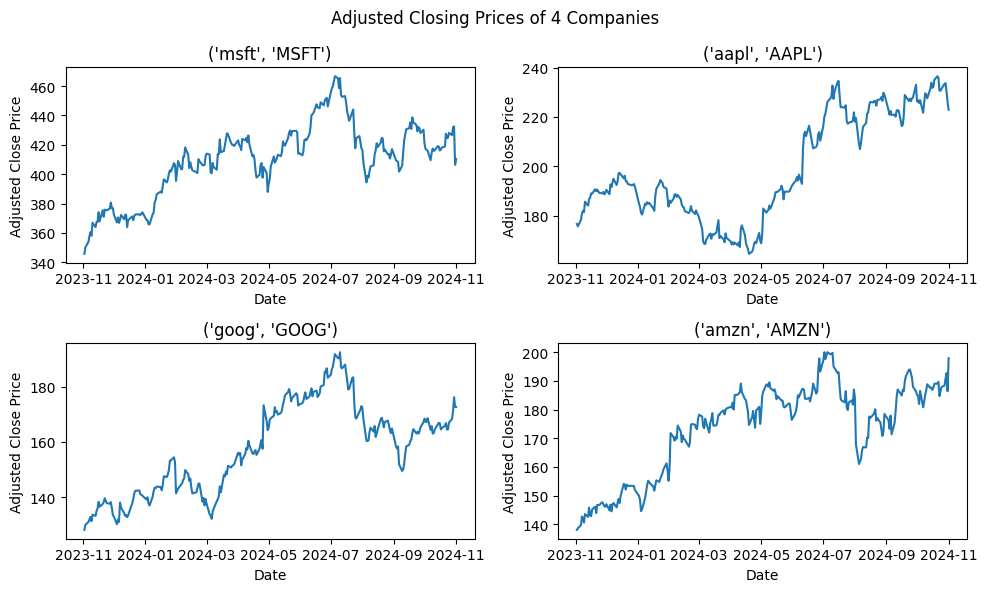

In [ ]:
# plot the adjusting close prices of 4 companies in subplots

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
fig.suptitle('Adjusted Closing Prices of 4 Companies')

# Iterate through the companies and plot each subplot
for i, company in enumerate(adj_close_data.columns):
    row = i // 2  # Determine the row for the subplot
    col = i % 2  # Determine the column for the subplot
    axes[row, col].plot(adj_close_data[company])
    axes[row, col].set_title(company)
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Adjusted Close Price')

plt.tight_layout()
plt.show()

2.3 Plotting Volume of Sales


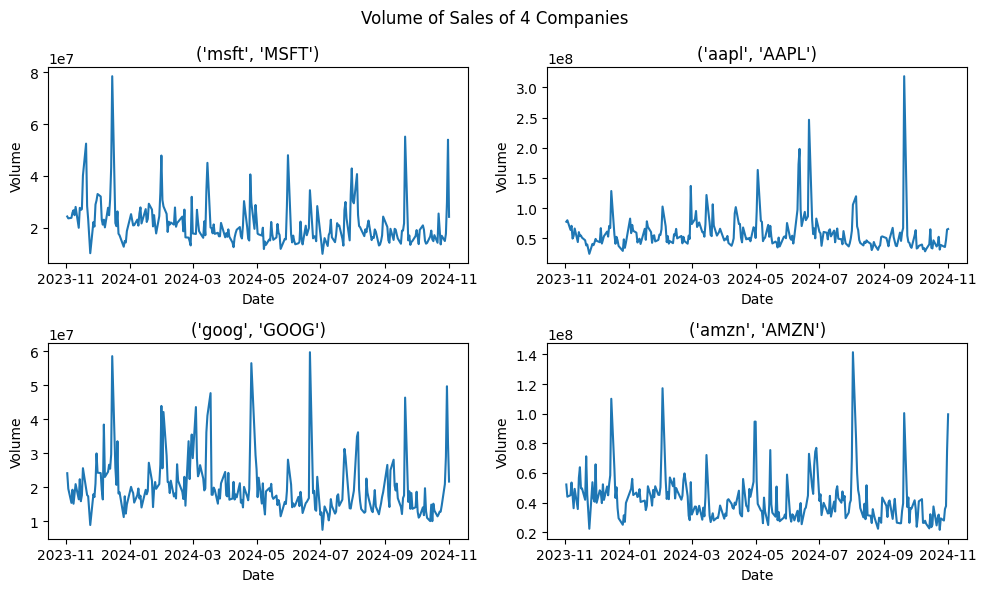

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
fig.suptitle('Volume of Sales of 4 Companies')

# Access the 'Volume' data from the original DataFrame 'df'
volume_data = df.xs('Volume', axis=1, level=1)

# Iterate through the companies and plot each subplot
for i, company in enumerate(volume_data.columns):
    row = i // 2  # Determine the row for the subplot
    col = i % 2  # Determine the column for the subplot
    axes[row, col].plot(volume_data[company])
    axes[row, col].set_title(company)
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Volume')

plt.tight_layout()
plt.show()

2.4 FEATURE ENGINEERING

Several features were created to aid in the analysis and modeling of stock prices:

Moving Averages: To capture trends, moving averages for 10, 20, and 50 days were calculated and added as new columns.

Daily Return: The percentage change in closing prices from day to day was calculated to gauge stock volatility and trends.

In [ ]:
import pandas as pd

# Calculate moving averages and daily returns for each ticker
for ticker, data in stock_data.items():
    data[f'{ticker}_MA_10'] = data['Adj Close'].rolling(window=10).mean()
    data[f'{ticker}_MA_20'] = data['Adj Close'].rolling(window=20).mean()
    data[f'{ticker}_MA_50'] = data['Adj Close'].rolling(window=50).mean()
    data[f'{ticker}_Daily_Return'] = data['Adj Close'].pct_change()

# Concatenate each ticker's DataFrame on common dates (inner join)
df = pd.concat(stock_data.values(), axis=1, join='inner')

# Flatten the multi-level columns
df.columns = ['_'.join(col).strip() for col in df.columns.values]

# Display the final DataFrame without NaNs on non-overlapping dates
print(df.tail())


                           Adj Close_MSFT  Close_MSFT   High_MSFT    Low_MSFT  \
Date                                                                            
2024-10-28 00:00:00+00:00      426.589996  426.589996  431.940002  426.299988   
2024-10-29 00:00:00+00:00      431.950012  431.950012  433.170013  425.799988   
2024-10-30 00:00:00+00:00      432.529999  432.529999  438.500000  432.100006   
2024-10-31 00:00:00+00:00      406.350006  406.350006  416.160004  406.299988   
2024-11-01 00:00:00+00:00      410.369995  410.369995  415.500000  407.500000   

                            Open_MSFT  Volume_MSFT  msft_MA_10_  msft_MA_20_  \
Date                                                                           
2024-10-28 00:00:00+00:00  431.660004     14882400   422.010001   419.176501   
2024-10-29 00:00:00+00:00  428.000000     17644100   423.331003   419.739502   
2024-10-30 00:00:00+00:00  437.440002     29749100   424.972003   420.509502   
2024-10-31 00:00:00+00:00  415.3


- Moving Averages (MAs) are a popular statistical tool used in time-series analysis, particularly in financial markets, to smooth out short-term fluctuations and highlight longer-term trends or cycles. By averaging the data points of a stock price over a specific time period, MAs provide insight into the general direction the stock is moving.

Formula for SMA:

𝑆
𝑀
𝐴
=
(𝑃
1
+
𝑃
2
+
.
.
.
+
𝑃
𝑛)
/ n
​

**Moving Average Crossovers:
When a short-term MA (e.g., 10-day) crosses above a long-term MA (e.g., 50-day), it indicates a bullish signal (buy). Conversely, when it crosses below, it's a bearish signal (sell).

- Daily returns represent the percentage change in the stock's adjusted closing price from one trading day to the next. This calculation helps in understanding the short-term performance of the stock and its volatility. The formula for daily return is:

$
\text{Daily Return}_t = \frac{\text{Price}_t - \text{Price}_{t-1}}{\text{Price}_{t-1}}
$




In [ ]:
df.columns

Index(['Adj Close_MSFT', 'Close_MSFT', 'High_MSFT', 'Low_MSFT', 'Open_MSFT',
       'Volume_MSFT', 'msft_MA_10_', 'msft_MA_20_', 'msft_MA_50_',
       'msft_Daily_Return_', 'Adj Close_AAPL', 'Close_AAPL', 'High_AAPL',
       'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'aapl_MA_10_', 'aapl_MA_20_',
       'aapl_MA_50_', 'aapl_Daily_Return_', 'Adj Close_GOOG', 'Close_GOOG',
       'High_GOOG', 'Low_GOOG', 'Open_GOOG', 'Volume_GOOG', 'goog_MA_10_',
       'goog_MA_20_', 'goog_MA_50_', 'goog_Daily_Return_', 'Adj Close_AMZN',
       'Close_AMZN', 'High_AMZN', 'Low_AMZN', 'Open_AMZN', 'Volume_AMZN',
       'amzn_MA_10_', 'amzn_MA_20_', 'amzn_MA_50_', 'amzn_Daily_Return_'],
      dtype='object')

2.4.1 Plotting Moving Averages

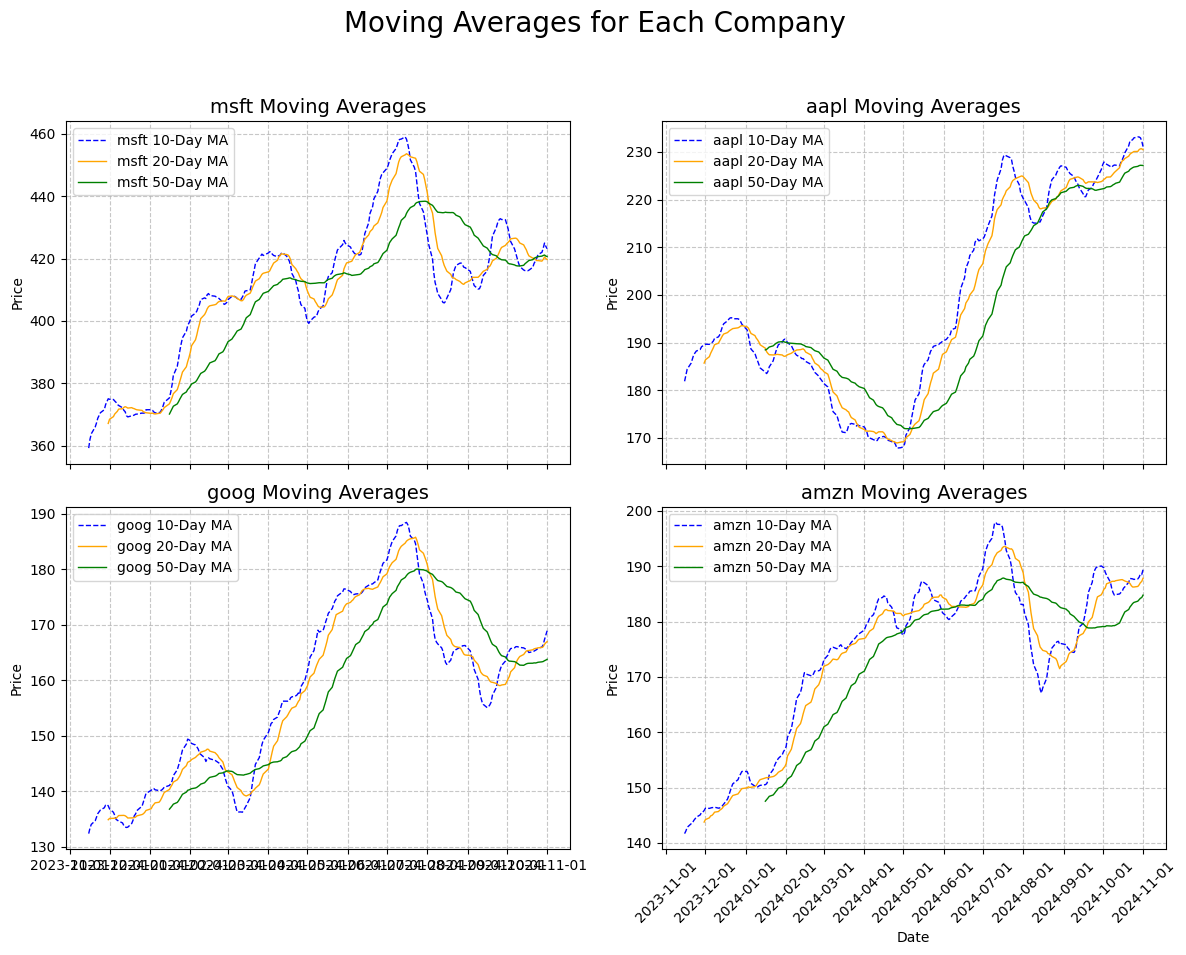

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define a list of tickers for subplots
tickers = list(stock_data.keys())

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), sharex=True)
fig.suptitle("Moving Averages for Each Company", fontsize=20)

# Flatten axes array for easier indexing when iterating over tickers
axes = axes.flatten()

# Plot moving averages for each ticker in a 2x2 grid
for i, ticker in enumerate(tickers):
    data = stock_data[ticker]
    ax = axes[i]  # Get the specific subplot axis for each ticker

    # Plot each moving average line
    ax.plot(data.index, data[f'{ticker}_MA_10'], label=f'{ticker} 10-Day MA', color='blue', linestyle='--', linewidth=1)
    ax.plot(data.index, data[f'{ticker}_MA_20'], label=f'{ticker} 20-Day MA', color='orange', linestyle='-', linewidth=1)
    ax.plot(data.index, data[f'{ticker}_MA_50'], label=f'{ticker} 50-Day MA', color='green', linestyle='-', linewidth=1)

    # Adding title, legend, and labels
    ax.set_title(f"{ticker} Moving Averages", fontsize=14)
    ax.legend(loc='upper left')
    ax.set_ylabel("Price")
    ax.grid(True, linestyle='--', alpha=0.7)

    # Set date formatting for x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator())

# Hide any extra subplots (if there are fewer than 4 tickers)
for j in range(len(tickers), 4):
    fig.delaxes(axes[j])

# General plot formatting
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()




The graph displays the adjusted closing prices and moving averages (10-day, 20-day, and 50-day) for Apple, Google, Microsoft, and Amazon. The blue line represents the adjusted closing prices, showing the stock's overall trend, while the orange, green, and red lines represent the 10-day, 20-day, and 50-day moving averages respectively, smoothing out the price fluctuations to show short, intermediate, and long-term trends. Apple, Google, and Microsoft exhibit upward momentum until mid-2024, followed by a correction, while Amazon's performance also peaks around the same period. The 10-day and 20-day moving averages closely follow the stock's price movement, reacting to short-term fluctuations, while the 50-day moving average shows a slower, more stable long-term trend.


2.4.2 Plotting Daily Returns

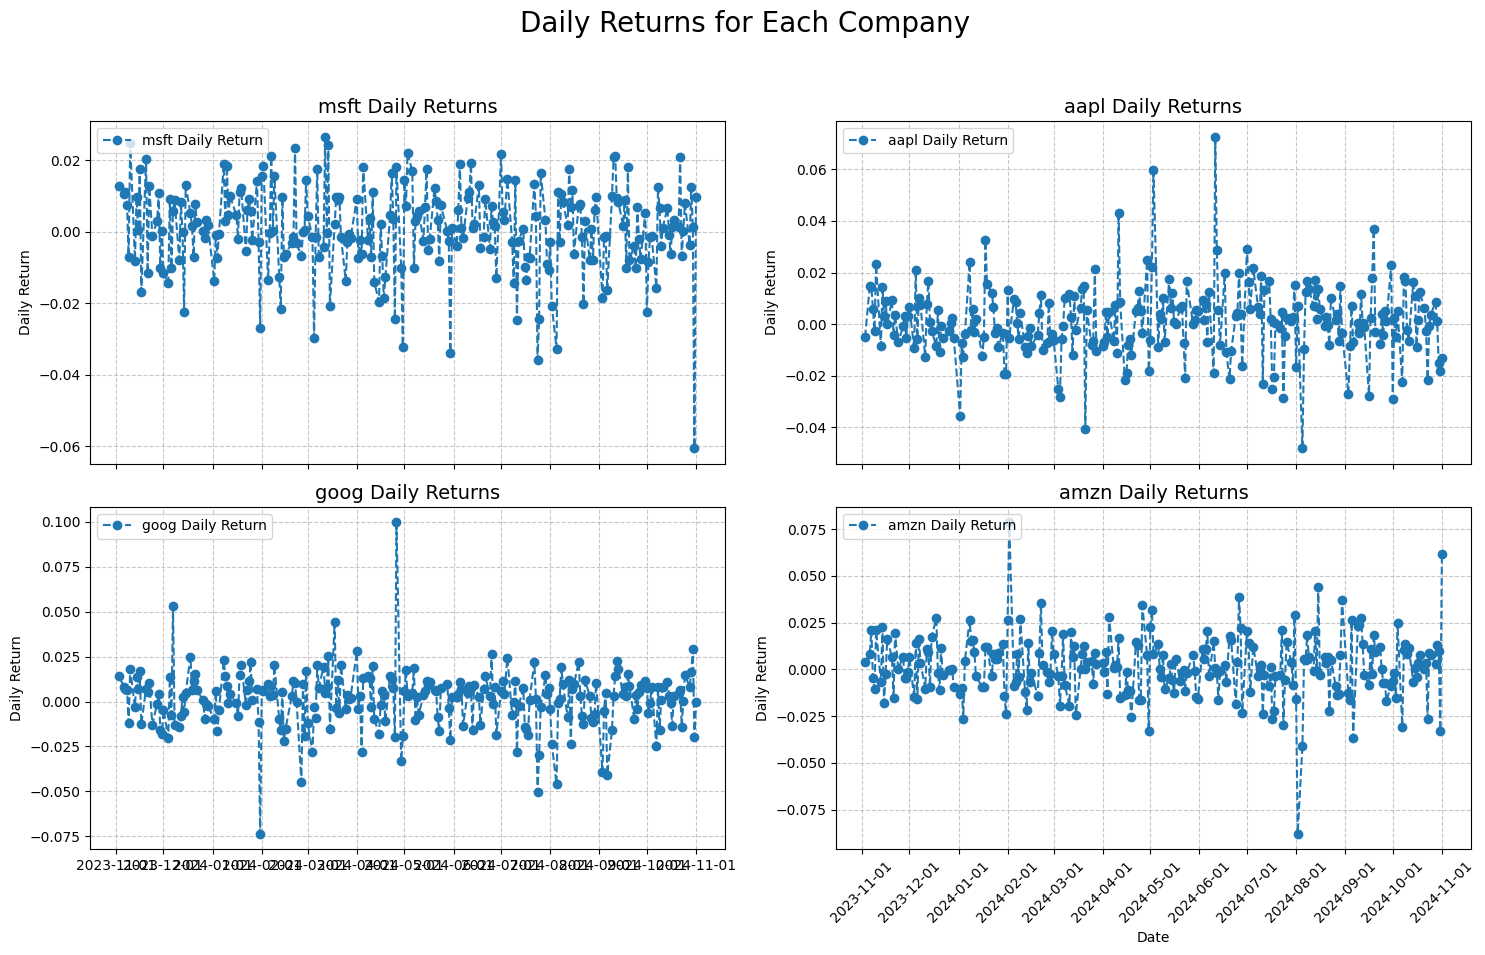

In [ ]:
# prompt: as above plot daily return

# Plot daily returns for each ticker
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True)
fig.suptitle("Daily Returns for Each Company", fontsize=20)
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    data = stock_data[ticker]
    ax = axes[i]
    ax.plot(data.index, data[f'{ticker}_Daily_Return'], label=f'{ticker} Daily Return', linestyle='--', marker='o')
    ax.set_title(f"{ticker} Daily Returns", fontsize=14)
    ax.legend(loc='upper left')
    ax.set_ylabel("Daily Return")
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator())

for j in range(len(tickers), 4):
    fig.delaxes(axes[j])

plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



$
\text{Daily Return}_t = \frac{\text{Price}_t - \text{Price}_{t-1}}{\text{Price}_{t-1}}
$

Where:
- $\text{Price}_t$ is the closing price on day \(t\).
- $\text{Price}_{t-1}$ is the closing price on day \(t-1\).

### **Example:**
If a stock closes at 150 on day 1 and 155 on day 2, the daily return is:

$
\frac{155 - 150}{150} = 0.0333 \, (3.33\%)
$

- **Positive return**: Stock price increased.
- **Negative return**: Stock price decreased.
- **Volatility**: Magnitude of fluctuations in daily returns shows risk.


2.5 Correlation Analysis

In [ ]:
# Initialize an empty DataFrame to store adjusted close prices
closing_df = pd.DataFrame()

# Collect adjusted close prices for each company in stock_data
for ticker in stock_data.keys():
    closing_df[ticker] = stock_data[ticker]['Adj Close']

# Calculate daily percentage returns
tech_rets = closing_df.pct_change()
tech_rets.head()


,msft,aapl,goog,amzn
Date,,,,
2023-11-02 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-11-03 00:00:00+00:00,0.012862,-0.005181,0.013921,0.003839
2023-11-06 00:00:00+00:00,0.010573,0.014605,0.008284,0.008225
2023-11-07 00:00:00+00:00,0.011219,0.014451,0.007227,0.021254
2023-11-08 00:00:00+00:00,0.007406,0.005885,0.006495,-0.004415


Now we retrieve the adjusted closing prices for the companies in tech_list (Apple, Google, Microsoft, and Amazon) from Yahoo Finance between the specified start and end dates. Then, we calculate the daily percentage returns for each company and displays the first few rows of the resulting DataFrame.

In [ ]:
print(tech_rets.columns)


Index(['msft', 'aapl', 'goog', 'amzn'], dtype='object')


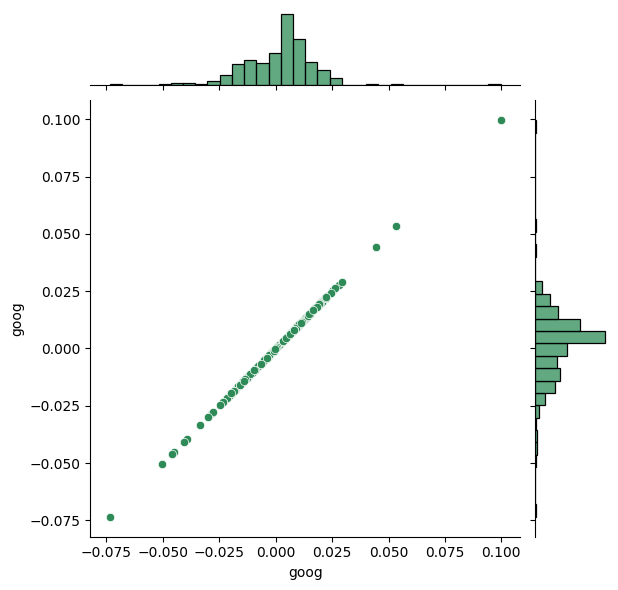

In [ ]:
import seaborn as sns
sns.jointplot(x='goog', y='goog', data=tech_rets, kind='scatter', color='seagreen')

The graph shows a joint plot for the stock returns of Google (GOOG). The plot includes:

- A **scatter plot** in the center showing the daily returns of GOOG on both the x and y axes. The points are tightly aligned along the diagonal, suggesting that the same data is plotted on both axes (GOOG vs. GOOG).
- **Histograms** on both the x and y axes that illustrate the distribution of daily returns. These histograms show a roughly normal distribution, with the majority of the data clustered around zero and fewer extreme values on either side.

This type of plot is useful for analyzing the distribution and relationships of returns for a specific stock. In this case, it highlights the symmetry and distribution of Google’s daily returns.


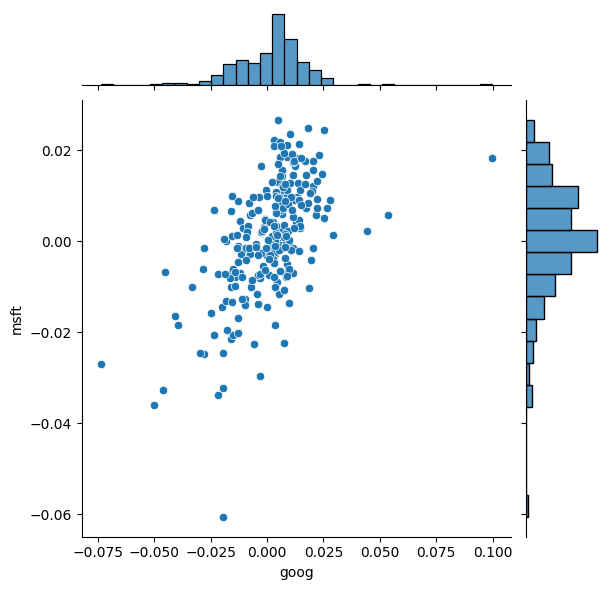

In [ ]:
sns.jointplot(x='goog', y='msft', data=tech_rets, kind='scatter')



*   This code snippet uses the Seaborn library to create a joint plot that visualizes the relationship between the daily returns of Google (GOOG) and Microsoft (MSFT) using a scatter plot. It displays the daily returns of Google on the x-axis and those of Microsoft on the y-axis, facilitating an examination of the correlation between the two stocks' performance. This visualization helps in identifying any patterns or relationships in the daily returns of both companies, providing insights into how their returns may be related to one another.



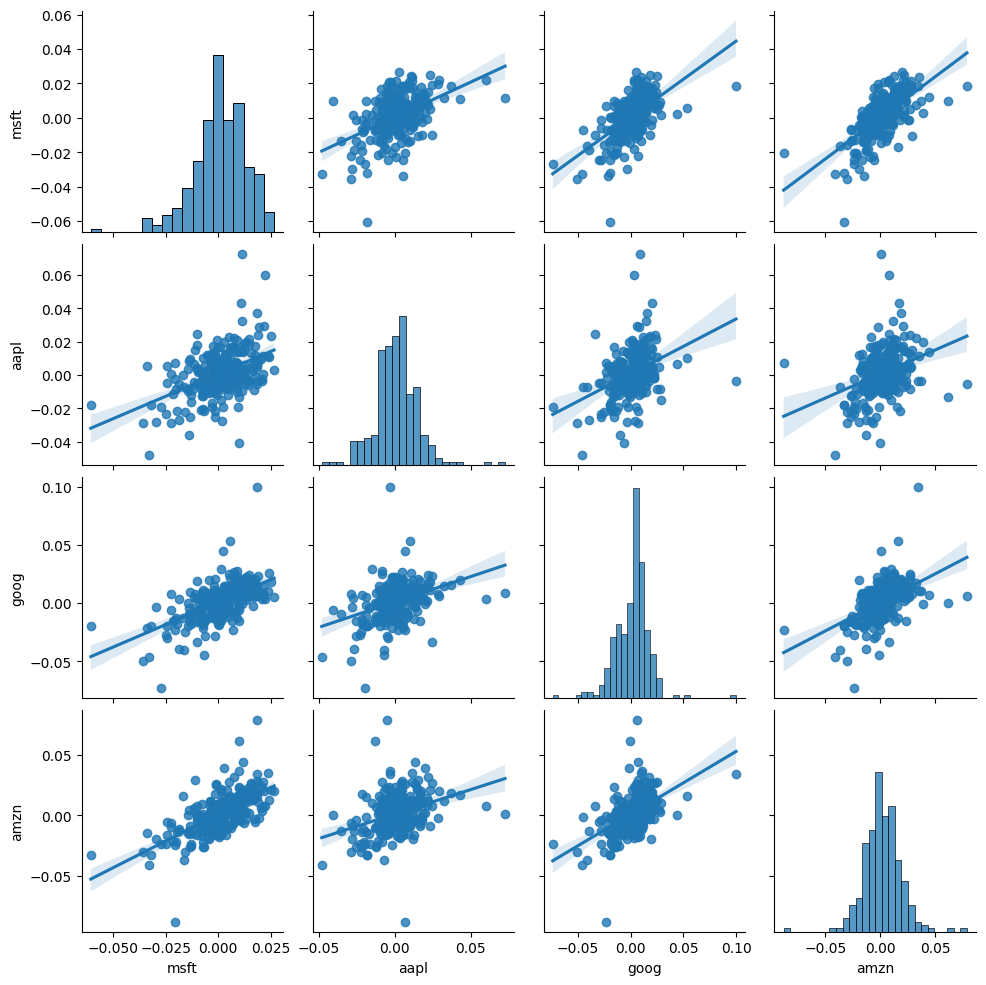

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_rets, kind='reg')



* This code snippet utilizes the Seaborn library to create a comprehensive PairGrid visualization for analyzing the daily returns of the technology stocks in the dataset. It first sets up a figure named returns_fig by creating a PairGrid from the DataFrame of daily returns, excluding any missing values. The upper triangle of the grid is populated with scatter plots, visualized in purple, to illustrate the relationships between different pairs of stocks. The lower triangle features kernel density estimate (KDE) plots, which use the 'cool_d' color map to provide a smooth representation of the distribution of daily returns. Lastly, the diagonal of the grid displays histograms of the daily returns, with 30 bins to show the frequency distribution for each stock. This multi-faceted visualization facilitates a thorough exploration of the relationships and distributions of daily returns among the selected technology stocks.



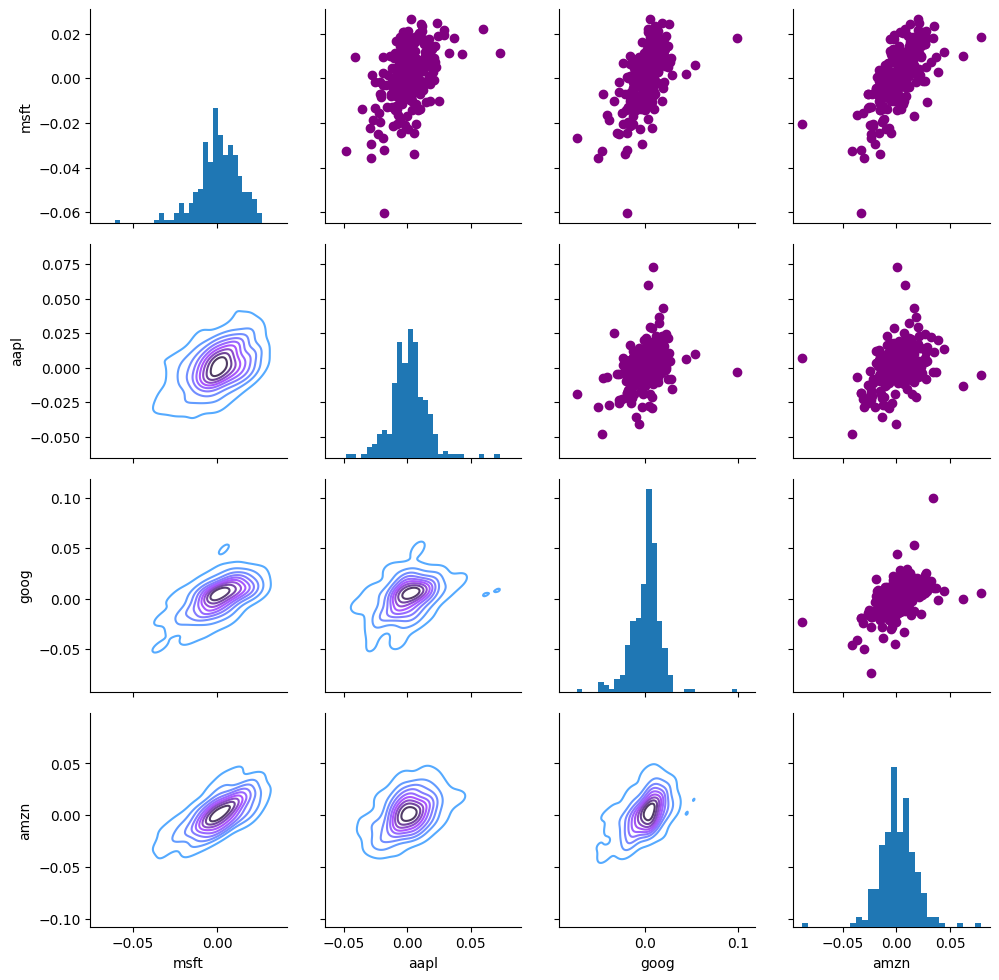

In [ ]:
import matplotlib.pyplot as plt
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

The image is a detailed pair plot visualizing the daily returns of four tech stocks: AAPL (Apple), AMZN (Amazon), GOOG (Google), and MSFT (Microsoft). The diagonal plots represent histograms of the daily returns for each stock, showing the distribution. The upper triangular plots consist of scatter plots with purple points, depicting the relationship between the stocks' returns. The lower triangular plots are contour plots based on Kernel Density Estimation (KDE), showing the probability density contours of the stocks' returns in a smooth, continuous form. This combination of visualizations offers insights into both individual and comparative return distributions for the stocks.

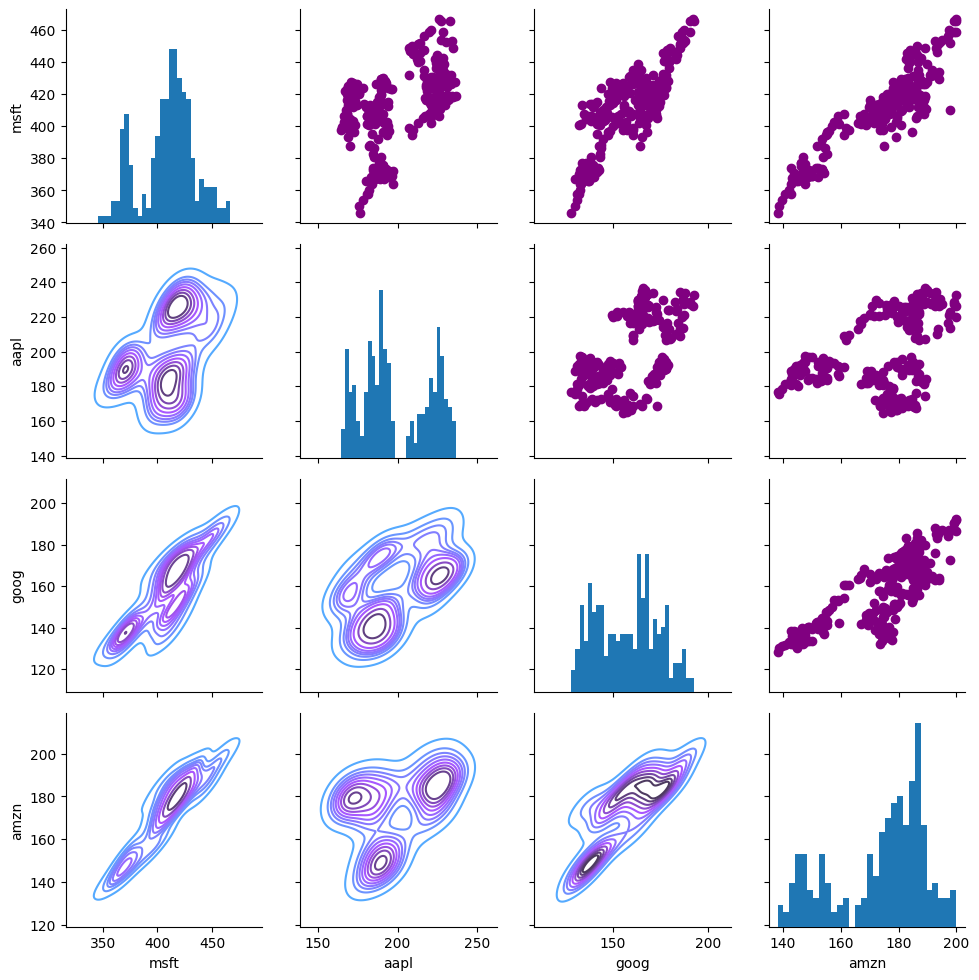

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

This pair plot visualizes the stock price relationships and distributions for four major tech companies: Apple (AAPL), Amazon (AMZN), Google (GOOG), and Microsoft (MSFT). The upper triangle features scatter plots showing pairwise relationships between the companies' stock prices, using purple markers to highlight correlations. The lower triangle displays Kernel Density Estimate (KDE) plots with smooth, blue-purple contours, illustrating the density and distribution of stock prices for each pair. Along the diagonal, histograms show the frequency distribution of each company's stock prices, providing insight into their individual price behaviors. This matrix offers a comprehensive view of stock price interactions and trends across the selected companies.








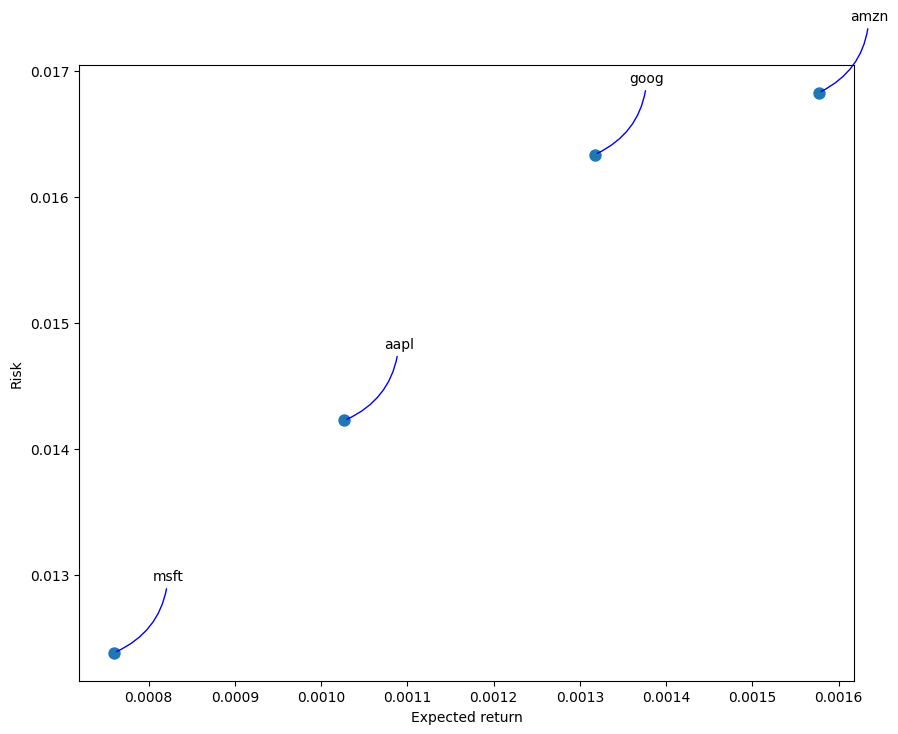

In [ ]:
import numpy as np
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

This chart visualizes the expected return and risk (standard deviation) of four major tech stocks: Google (GOOG), Amazon (AMZN), Apple (AAPL), and Microsoft (MSFT). The x-axis represents the expected return, while the y-axis represents the risk. Each stock is represented by a point, with its position reflecting the balance between risk and return. Blue curved arrows point to the individual stocks, and the scatter points are scaled to enhance visibility. AMZN and GOOG appear to have higher returns but also higher risk, while MSFT and AAPL are situated lower on both scales, indicating relatively lower risk and return. This plot is useful for comparing the risk-reward profiles of these stocks.

Text(0.5, 1.0, 'Correlation of stock closing price')

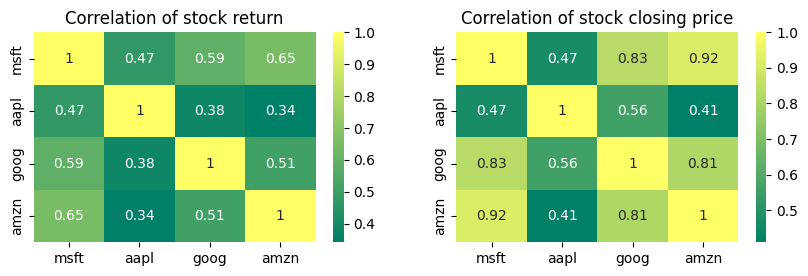

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Correlation insights from the heatmaps:

1. Stock Return Correlation:

- The heatmap for stock returns shows the correlation between the percentage changes in closing prices of different stocks.
- High positive correlation (close to 1) indicates that when one stock's return increases, the other stock's return is likely to increase as well. This suggests they move together in the market.
- High negative correlation (close to -1) indicates that when one stock's return increases, the other stock's return is likely to decrease. This suggests an inverse relationship between their movements.
- Correlation close to 0 suggests no strong linear relationship between the stocks.

2. Stock Closing Price Correlation:

- The heatmap for closing prices shows the correlation between the actual closing prices of different stocks.
- High positive correlation indicates a tendency for both stocks to move in the same direction in terms of their price levels.
- High negative correlation indicates a tendency for stocks to move in opposite directions in terms of their price levels.
- Correlation close to 0 suggests no strong linear relationship between the stock closing prices.




** Generally, there is a positive correlation among the closing prices of GOOG, MSFT, and AMZN. This is expected as these are large, well-established technology companies, and their stock prices tend to move together.

** The correlation between returns can be a bit different, as the returns can be affected by various factors like news, sector performance, and company-specific events.

** By analyzing the correlation matrix, we can understand the relationship between different stocks. We can identify stocks that tend to move together or stocks that exhibit opposing behavior. This information can be helpful for portfolio diversification and risk management.


**PRICE PREDICTION FOR APPLE STOCK**

**3. MODEL BUILDING**

3.1 Train-Test Split

To build a reliable LSTM model, the dataset was split into training and testing sets. 95% of the data was used for training the model, while the remaining 5% was reserved for testing and evaluation.

In [ ]:
import yfinance as yf

# Get the stock data
df = yf.download('AAPL',period="10y")
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-11-03 00:00:00+00:00,24.284262,27.350000,27.575001,27.002501,27.055000,209130400
2014-11-04 00:00:00+00:00,24.106684,27.150000,27.372499,26.930000,27.340000,166297600
2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600
2014-11-06 00:00:00+00:00,24.233509,27.174999,27.197500,26.950001,27.150000,139874000
2014-11-07 00:00:00+00:00,24.302620,27.252501,27.330000,27.137501,27.187500,134766000
...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,233.399994,233.399994,234.729996,232.550003,233.320007,36087100
2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200


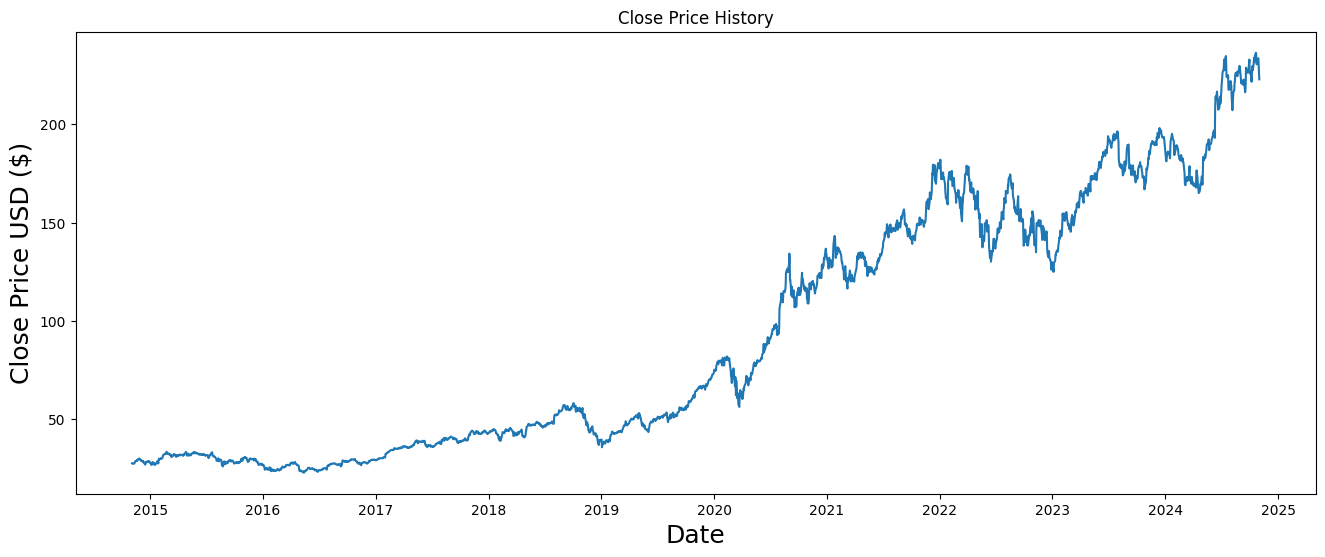

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close']['AAPL'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
import numpy as np

# Access the 'Close' column for 'AAPL' using multilevel indexing
data = df.loc[:, ('Close', 'AAPL')]

# Convert the Series to a DataFrame
data = data.to_frame()

# Rename the column to 'Close' (optional, for consistency)
data.columns = ['Close']

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

print(dataset.shape)
training_data_len

(2517, 1)


2392

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02227729],
       [0.02134225],
       [0.02164614],
       ...,
       [0.97017233],
       [0.95058327],
       [0.93655769]])

In [ ]:
# Create the training data set

train_data = scaled_data[0:int(training_data_len),:]

# Create sequences for training the LSTM model
x_train = []
y_train = []

# Use slicing instead of iloc for numpy arrays
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])  # Append past 60 days' scaled data
    y_train.append(train_data[i,0])    # Append the target value (scaled Adj Close)
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert to numpy arrays and reshape for LSTM input
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Check the shapes of the arrays
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

[array([0.02227729, 0.02134225, 0.02164614, 0.02145913, 0.02182146,
       0.02161108, 0.02262793, 0.02443957, 0.02627458, 0.02786414,
       0.02764207, 0.02937189, 0.02843685, 0.03035368, 0.03054069,
       0.03306529, 0.03186143, 0.03349775, 0.03341593, 0.02890437,
       0.0283901 , 0.02990954, 0.02939527, 0.02882256, 0.02578369,
       0.02779402, 0.02525772, 0.02487202, 0.022663  , 0.0209098 ,
       0.01917998, 0.02228898, 0.02607588, 0.02505903, 0.02641484,
       0.02594732, 0.02532785, 0.02764207, 0.02754857, 0.02592394,
       0.02342271, 0.02219548, 0.01859558, 0.01860727, 0.02034877,
       0.0251876 , 0.02532785, 0.02210197, 0.02323571, 0.02274481,
       0.01926179, 0.01829169, 0.02148251, 0.02245261, 0.02578369,
       0.02646159, 0.02660184, 0.0219734 , 0.02918488, 0.03338087])]
[0.03134716536751696]

[array([0.02227729, 0.02134225, 0.02164614, 0.02145913, 0.02182146,
       0.02161108, 0.02262793, 0.02443957, 0.02627458, 0.02786414,
       0.02764207, 0.02937189, 0.02

3.3 Build the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))  # 60 time steps, 1 feature
model.add(LSTM(64, return_sequences=False))  # Output of the last LSTM layer
model.add(Dense(25))  # Dense layer with 25 units
model.add(Dense(1))  # Final output layer with 1 unit

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=30)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - loss: 0.0182
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 4.0429e-04
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 3.0944e-04
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 2.8957e-04
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 3.3383e-04
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - loss: 3.7082e-04
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 2.7075e-04
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 2.6689e-04
Epoch 9/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - loss: 3.1065e-04
Epoch 10/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 3.0306e-04
Epoch 11/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 2.5463e-04
Epoch 12/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - loss: 2.3468e-04
Epoch 13/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 2.3367e-04
Epoch 14/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - loss: 2.1839e-04
Epoc

3.4 Testing and Evaluation

In [ ]:
# Create the testing data set
# Create a new array containing scaled values starting from 'training_data_len - 60'
test_data = scaled_data[training_data_len - 60:, :]  # Adjust based on how you split data

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # Use only the first column (Adjusted Close)

# Append the past 60 days' data for each day in test_data
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])  # Use only the first feature for LSTM

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Since you scaled only one column, you can directly reshape the predictions
predictions = scaler.inverse_transform(predictions)  # Inverse transform predictions

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions- y_test) ** 2))  # Flatten to match dimensions
print(f"Root Mean Squared Error: {rmse}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step
Root Mean Squared Error: 3.574950417926565


3.5 Visualize the Results

<ipython-input-88-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


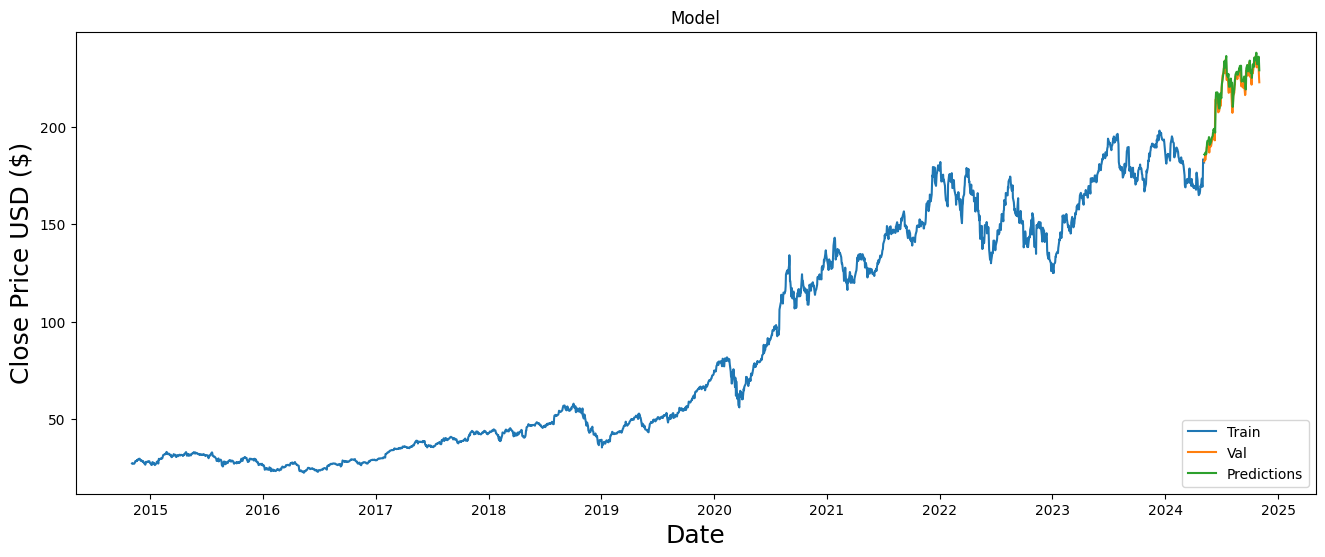

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2024-05-07 00:00:00+00:00,182.399994,185.882797
2024-05-08 00:00:00+00:00,182.740005,186.079956
2024-05-09 00:00:00+00:00,184.570007,185.801926
2024-05-10 00:00:00+00:00,183.050003,186.808762
2024-05-13 00:00:00+00:00,186.279999,186.052917
...,...,...
2024-10-28 00:00:00+00:00,233.399994,232.828049
2024-10-29 00:00:00+00:00,233.669998,235.008453
2024-10-30 00:00:00+00:00,230.100006,236.020020
